In [1]:
import os
import numpy as np

In [2]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

In [3]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size


In [13]:
from matplotlib import pyplot as plt
import random

train_img_dir = "D:/Data/input_data/train/images/"
train_mask_dir = "D:/Data/input_data/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)


In [14]:
train_img_list

['image_1.npy',
 'image_10.npy',
 'image_1000.npy',
 'image_1001.npy',
 'image_1002.npy',
 'image_1005.npy',
 'image_1008.npy',
 'image_1009.npy',
 'image_1011.npy',
 'image_1013.npy',
 'image_1014.npy',
 'image_1015.npy',
 'image_1016.npy',
 'image_1017.npy',
 'image_102.npy',
 'image_1021.npy',
 'image_1022.npy',
 'image_1024.npy',
 'image_1025.npy',
 'image_1026.npy',
 'image_1027.npy',
 'image_1028.npy',
 'image_1029.npy',
 'image_103.npy',
 'image_1030.npy',
 'image_1032.npy',
 'image_1033.npy',
 'image_1034.npy',
 'image_1036.npy',
 'image_1038.npy',
 'image_1039.npy',
 'image_104.npy',
 'image_1040.npy',
 'image_1041.npy',
 'image_1042.npy',
 'image_1044.npy',
 'image_1045.npy',
 'image_1046.npy',
 'image_1047.npy',
 'image_1048.npy',
 'image_105.npy',
 'image_1050.npy',
 'image_1052.npy',
 'image_1053.npy',
 'image_1056.npy',
 'image_1057.npy',
 'image_1058.npy',
 'image_1062.npy',
 'image_1063.npy',
 'image_1065.npy',
 'image_1066.npy',
 'image_1067.npy',
 'image_107.npy',
 'i

In [15]:
train_mask_list

['mask_1.npy',
 'mask_10.npy',
 'mask_1000.npy',
 'mask_1001.npy',
 'mask_1002.npy',
 'mask_1005.npy',
 'mask_1008.npy',
 'mask_1009.npy',
 'mask_1011.npy',
 'mask_1013.npy',
 'mask_1014.npy',
 'mask_1015.npy',
 'mask_1016.npy',
 'mask_1017.npy',
 'mask_102.npy',
 'mask_1021.npy',
 'mask_1022.npy',
 'mask_1024.npy',
 'mask_1025.npy',
 'mask_1026.npy',
 'mask_1027.npy',
 'mask_1028.npy',
 'mask_1029.npy',
 'mask_103.npy',
 'mask_1030.npy',
 'mask_1032.npy',
 'mask_1033.npy',
 'mask_1034.npy',
 'mask_1036.npy',
 'mask_1038.npy',
 'mask_1039.npy',
 'mask_104.npy',
 'mask_1040.npy',
 'mask_1041.npy',
 'mask_1042.npy',
 'mask_1044.npy',
 'mask_1045.npy',
 'mask_1046.npy',
 'mask_1047.npy',
 'mask_1048.npy',
 'mask_105.npy',
 'mask_1050.npy',
 'mask_1052.npy',
 'mask_1053.npy',
 'mask_1056.npy',
 'mask_1057.npy',
 'mask_1058.npy',
 'mask_1062.npy',
 'mask_1063.npy',
 'mask_1065.npy',
 'mask_1066.npy',
 'mask_1067.npy',
 'mask_107.npy',
 'mask_1071.npy',
 'mask_1072.npy',
 'mask_1073.npy',
 '

In [16]:
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

In [17]:
img, msk = train_img_datagen.__next__()

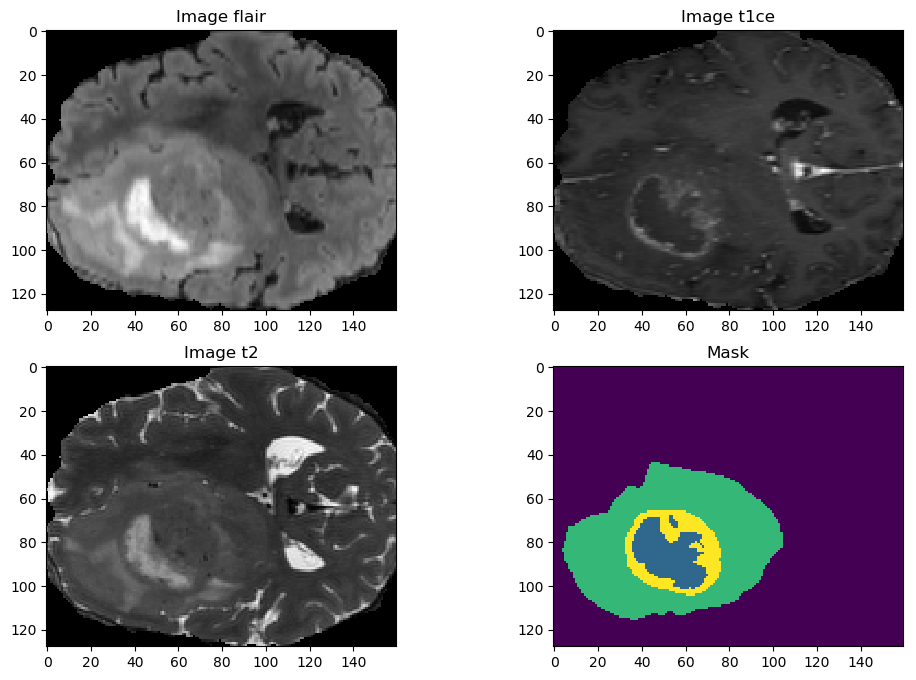

In [25]:
img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=64
# n_slice=random.randint(0, test_mask.shape[2])
# print(n_slice)
# print( test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()
